# Interactive event and timeline query

This file creates a graphical menu with the events of the file selected.

You can select events, and the animals to use for the events

For instance, if you choose a follow event with animal A and B, this script will create a timeline with all those events and will display a number of data corresponding to this timeline.

If you set a follow event with animal A set and **no** animal B, the script will gather all events where A follow an animal, whatever the animal followed. Then all events (even if overlapping) will be merged in one timeline. You can also not set the animal A and only the B, and you will get all event where animal B is followed, whatever the animal following.

| ![](../images/interactivequery.jpg) | 
|:--:| 
|Example of generated interactive query: provide data for follow of A follow B. start and end time are in frames (30 frames = 1 second) |



In [1]:
'''
Created on 15 fev. 2019

@author: Fab
'''
%matplotlib inline

import sys
sys.path.insert(1, "../")


import pandas as pd
import numpy as np

import sqlite3
from lmtanalysis.FileUtil import getFilesToProcess

from lmtanalysis.Animal import AnimalPool
from lmtanalysis.Animal import Animal
from lmtanalysis.Measure import *
from lmtanalysis.Event import EventTimeLine, plotMultipleTimeLine

from lmtanalysis.Util import convert_to_d_h_m_s
from lmtanalysis.Util import d_h_m_s_toText

from lmtanalysis.Measure import oneDay

# widgets

import ipywidgets as widgets
from IPython.display import display
from IPython.core.display import HTML

## Ask file to process to the user with a dialog window:
* note: You can run this step only once, and then keep processing the file(s) with the next cells.
* note2: the file window can be hidden by other windows.

In [2]:
#ask the user for database to process
files = getFilesToProcess()

## Grab all events and animals available, and create widgets with it.
* We create a widget with all events available
* We create a widget with all the animals available

In [3]:

def getAllEvents( file ):
    print( "Loading events...")
    connection = sqlite3.connect( file )
    query = "select name from event group by name"
    c = connection.cursor()     
    c.execute( query )    
    all_rows = c.fetchall()        
    header = [ "Name" ]
    data =[]    
    for row in all_rows:
        data.append( row[0] )
    return data


file = files[0]
eventList = getAllEvents( file )

connection = sqlite3.connect( file )
animalPool = AnimalPool()
animalPool.loadAnimals( connection )


animalIdList = []
animalIdList.append( "Any animal" )
for animalKey in animalPool.getAnimalDictionnary():
    animal = animalPool.getAnimalDictionnary()[animalKey]
    animalIdList.append( animal )
    

eventWidget = widgets.Dropdown(
    options=eventList,    
    description='Event name:',
    disabled=False,
)

animalWidget = {}
animalWidget['A'] = widgets.Dropdown( options=animalIdList, description='Animal A:' )
animalWidget['B'] = widgets.Dropdown( options=animalIdList, description='Animal B:' )
animalWidget['C'] = widgets.Dropdown( options=animalIdList, description='Animal C:' )
animalWidget['D'] = widgets.Dropdown( options=animalIdList, description='Animal D:' )

display( eventWidget )
display( animalWidget['A'] )
display( animalWidget['B'] )
display( animalWidget['C'] )
display( animalWidget['D'] )

startFrameWidget = widgets.IntText( value=0, description='Start time (in frame):' )
endFrameWidget = widgets.IntText( value= oneDay, description='End time (in frame):' )
display( startFrameWidget , endFrameWidget )


Loading events...
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'NAME', 'GENOTYPE', 'IND']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE,IND FROM ANIMAL ORDER BY GENOTYPE
Animal Id:1 Name:A RFID:000004395909 Genotype:KO User1:KO1
Animal Id:4 Name:D RFID:000004395810 Genotype:KO User1:KO2
Animal Id:2 Name:B RFID:000004395685 Genotype:WT User1:WT1
Animal Id:3 Name:C RFID:000004395945 Genotype:WT User1:WT2


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

# Provide a result with selected event and animals

Event selected:  Approach
Animal A:  Animal Id:1 Name:A RFID:000004395909 Genotype:KO User1:KO1
Animal B:  Animal Id:4 Name:D RFID:000004395810 Genotype:KO User1:KO2
Animal C:  Any animal
Animal D:  Any animal
Start time:  0 days 0 hours 0 minutes 0 seconds 0 frames
End time:  0 days 0 hours 55 minutes 33 seconds 10 frames
Approach  Id( 1 , 4 , None , None ) Min/maxFrame: ( 0 / 100000 ) Loaded ( 2289  records loaded in  1.7416279315948486 S )


,Start frame,End frame,Duration (in frame)
0,5,5,1
1,35,39,5
2,48,56,9
3,64,73,10
4,85,90,6
5,141,141,1
6,156,164,9
7,195,199,5
8,201,206,6
9,233,238,6


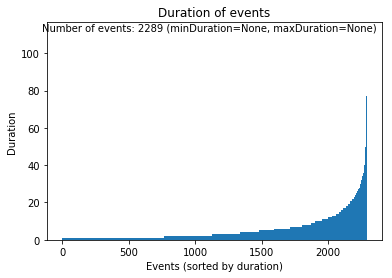

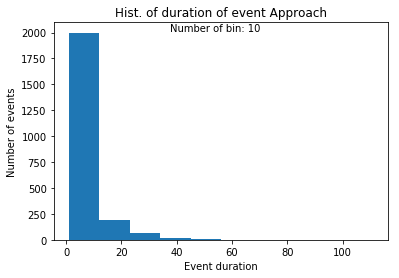

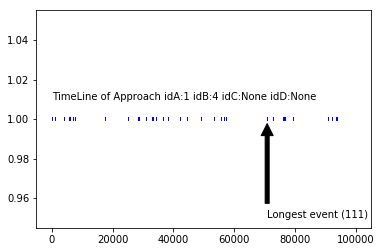

Animal Id:1 Name:A RFID:000004395909 Genotype:KO User1:KO1 : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=1 AND FRAMENUMBER>=0 AND FRAMENUMBER<=100000
Animal Id:1 Name:A RFID:000004395909 Genotype:KO User1:KO1   92851  detections loaded in 21.08604669570923 seconds.
Animal Id:4 Name:D RFID:000004395810 Genotype:KO User1:KO2 : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=4 AND FRAMENUMBER>=0 AND FRAMENUMBER<=100000
Animal Id:4 Name:D RFID:000004395810 Genotype:KO User1:KO2   95996  detections loaded in 1.462766408920288 seconds.
Animal Id:2 Name:B RFID:000004395685 Genotype:WT User1:WT1 : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHE

Draw trajectory of animal A


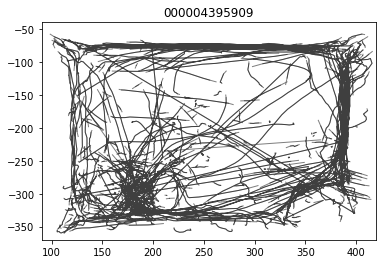

Draw trajectory of animal D


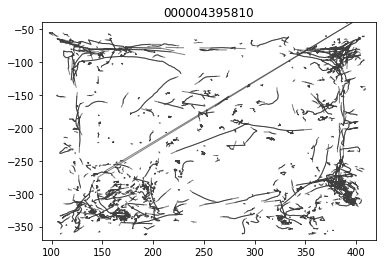

Draw trajectory of animal B


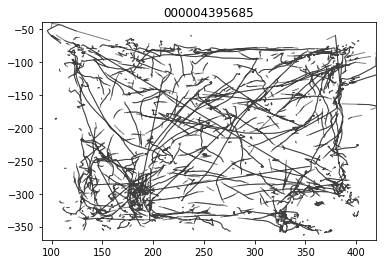

Draw trajectory of animal C


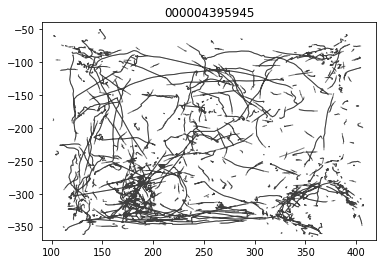

In [4]:
def getAnimalBaseIdFromWidget( value ):
    if type(value) is Animal:
        return value.baseId
    return None

def printBold( txt , color="black"):
    display(HTML("<font color={}><h1>{}</h1></font>".format( color, txt ) ))    
    
def isInvolved( animal ):
    """ Check if the animal is involved in the current query """
    for k in animalWidget:
        id = getAnimalBaseIdFromWidget( animalWidget[k].value )
        if ( id== animal.baseId ):
            return True
    return False            

print( "Event selected: ", eventWidget.value )
print( "Animal A: " , animalWidget['A'].value )
print( "Animal B: " , animalWidget['B'].value )
print( "Animal C: " , animalWidget['C'].value )
print( "Animal D: " , animalWidget['D'].value )

minFrame = startFrameWidget.value
maxFrame = endFrameWidget.value

print ( "Start time: ", d_h_m_s_toText ( convert_to_d_h_m_s( minFrame ) ) )
print ( "End time: ", d_h_m_s_toText ( convert_to_d_h_m_s( maxFrame ) ) )

idA = getAnimalBaseIdFromWidget( animalWidget['A'].value )
idB = getAnimalBaseIdFromWidget( animalWidget['B'].value )
idC = getAnimalBaseIdFromWidget( animalWidget['C'].value )
idD = getAnimalBaseIdFromWidget( animalWidget['D'].value )

eventTimeLine = EventTimeLine( connection, eventWidget.value, idA = idA, idB = idB, idC = idC, idD = idD, minFrame = minFrame, maxFrame = maxFrame )        

printBold( eventTimeLine )
# display number of events:
printBold( "Number of events : " + str(eventTimeLine.getNumberOfEvent()) , color = "red" )

# display events in time line
data = []
    
for event in eventTimeLine.eventList:
    data.append( [ event.startFrame, event.endFrame, event.duration() ] )
    #print( event.startFrame, event.endFrame, event.duration() )

df = pd.DataFrame( data = np.array( data ), columns=[ "Start frame","End frame", "Duration (in frame)" ] )
display( df )

printBold( "Distribution of duration of events:" )
eventTimeLine.plotEventDurationDistributionBar()
printBold( "Distribution of duration of events in bins:" )
eventTimeLine.plotEventDurationDistributionHist()
printBold( "Time line of event:" )
eventTimeLine.plotTimeLine()

#show location of events

animalPool.loadDetection( start= minFrame, end = maxFrame )
animalPool.filterDetectionByEventTimeLine( eventTimeLine )

for animalKey in animalPool.getAnimalDictionnary():
    animal = animalPool.getAnimalDictionnary()[animalKey]
    
    if isInvolved( animal ) :
        printBold( "involved", color ="green")        
    else:
        printBold( "this animal not involved in event definition", color ="red" )
    
    animal.plotTrajectory()

